# Lab 2 - Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Topological Ordering of Animal Species

#### Import data

In [2]:
species = np.genfromtxt('data/animalnames.txt', dtype='str')
props = np.genfromtxt('data/animals.dat', dtype='int', delimiter=',').reshape(-1, 84)

#### Train nodes using SOM

In [3]:
N,M = props.shape
num_nodes = 100
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 50
neigh_decay = neighbourhood_start/epochs

for e in range(epochs):
    neighbourhood = round(neighbourhood_start - neigh_decay*e)
    for idx in range(N):
        p = props[idx]
        W_p = W-p
        distances = np.linalg.norm(W_p, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(p-W[node])

#### Find and winner nodes for each species

In [4]:
pos = [-1] * N
for idx in range(N):
    p = props[idx]
    W_p = W-p
    distances = np.linalg.norm(W_p, axis=1)
    winner = np.argmin(distances)
    pos[idx] = winner

grouped = [(eval(species[i]),pos[i]) for i in range(N)]
grouped.sort(key=lambda t: t[1])
for i in range(N): print(grouped[i])

('dragonfly', 0)
('grasshopper', 0)
('beetle', 3)
('butterfly', 5)
('housefly', 9)
('moskito', 9)
('spider', 15)
('duck', 22)
('pelican', 22)
('penguin', 26)
('ostrich', 29)
('frog', 37)
('seaturtle', 40)
('crocodile', 43)
('walrus', 49)
('bear', 55)
('ape', 61)
('hyena', 62)
('skunk', 65)
('dog', 68)
('cat', 75)
('lion', 75)
('rat', 78)
('rabbit', 81)
('bat', 87)
('elephant', 87)
('kangaroo', 91)
('antelop', 92)
('horse', 95)
('camel', 98)
('giraffe', 98)
('pig', 98)


## Cyclic tour

#### Import data

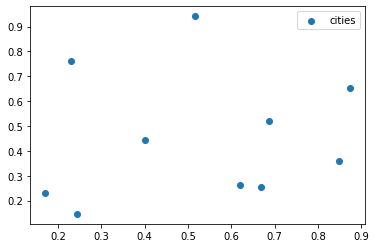

In [5]:
import io
s = io.BytesIO(open('data/cities.dat', 'rb').read().replace(b';',b''))
city = np.genfromtxt(s, dtype='float', delimiter=',', comments='%')
plt.scatter(city[:,0], city[:,1], label='cities')
plt.legend()
plt.show()

#### Train nodes using SOM

In [6]:
N,M = city.shape
num_nodes = N
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 2
neigh_decay = neighbourhood_start/epochs

for e in range(epochs): 
    neighbourhood = round(neighbourhood_start - neigh_decay*e) 
    for idx in range(N):
        c = city[idx]
        W_c = W-c
        distances = np.linalg.norm(W_c, axis=1)
        winner = np.argmin(distances)
        for node in range(num_nodes):
            if node >= winner-neighbourhood and node <= winner+neighbourhood:
                W[node] = W[node] + lr*(c-W[node])
            elif winner+neighbourhood >= N and node <= (winner+neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])
            elif winner-neighbourhood < 0 and node >= (winner-neighbourhood) % N:
                W[node] = W[node] + lr*(c-W[node])

#### Plot found tour

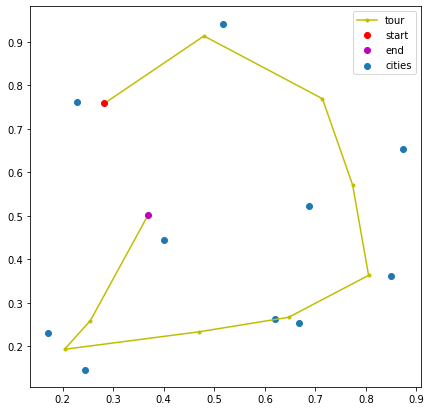

In [7]:
pos = [-1] * N
plt.figure(figsize=(7,7))
plt.scatter(city[:,0], city[:,1], label='cities')
plt.plot(W[:,0], W[:,1], 'y.-', label='tour')
plt.plot(W[0,0],W[0,1], 'ro', label='start')
plt.plot(W[N-1,0],W[N-1,1], 'mo', label='end')
plt.legend()
plt.show()

## Data Clustering: Votes of MPs

#### Import data

In [8]:
votes = np.genfromtxt('data/votes.dat', comments='%', delimiter=',').reshape(349,-1)
party = np.genfromtxt('data/mpparty.dat', comments='%', delimiter=',')
sex = np.genfromtxt('data/mpsex.dat', comments='%', delimiter=',')
district = np.genfromtxt('data/mpdistrict.dat', comments='%', delimiter=',')
name = np.genfromtxt('data/mpnames.txt', delimiter='\n', dtype='str', encoding='latin-1')

#### Train nodes using SOM

In [9]:
N,M = votes.shape
grid_rows = 10
grid_cols = 10
num_nodes = grid_rows * grid_cols
W = np.random.randn(num_nodes,M)
lr = 0.2
epochs = 20
neighbourhood_start = 50
neigh_decay = neighbourhood_start/epochs

for e in range(epochs):
    neighbourhood = round(neighbourhood_start - neigh_decay*e)
    for idx in range(N):
        p = votes[idx]
        W_p = W-p
        distances = np.linalg.norm(W_p, axis=1)
        winner = np.argmin(distances)
        winner_row = int(winner/grid_rows)
        winner_col = winner % grid_cols
        for node_row in range(grid_rows):
            for node_col in range(grid_cols):
                manhattan_dist = abs(winner_row-node_row)+abs(winner_col-node_col)
                if manhattan_dist < neighbourhood:
                    node = node_row*grid_rows + node_col
                    W[node] = W[node] + lr*(p-W[node])

#### Calculate grid positions for each MP

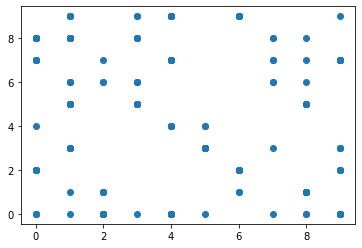

In [15]:
grid_x = np.zeros(N)
grid_y = np.zeros(N)
for idx in range(N):
    p = votes[idx]
    W_p = W-p
    distances = np.linalg.norm(W_p, axis=1)
    winner = np.argmin(distances)
    winner_row = int(winner/grid_rows)
    winner_col = int(winner % grid_cols)
    grid_x[idx] = winner_col
    grid_y[idx] = winner_row
plt.scatter(grid_x,grid_y)

#### Plot grid positions based on party

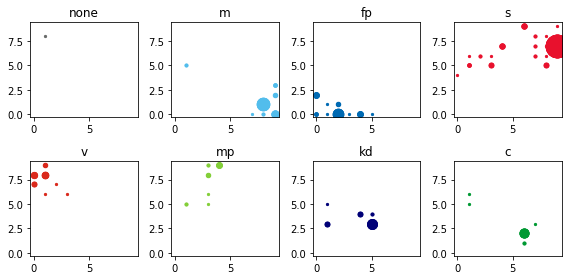

In [11]:
parties = ['none', 'm', 'fp', 's', 'v', 'mp', 'kd', 'c']
pcolors = ['#696b6a', '#52BDEC', '#006AB3', '#E8112d', 
           '#DA291C', '#83CF39', '#000077', '#009933']
fig, axs = plt.subplots(2,4,figsize=(8,4))
for i in range(0,len(parties)):
    counts = np.array([[0] * grid_cols] * grid_rows)
    mps = np.where(party == i)[0]
    mps_x = grid_x[mps].astype(int); mps_y = grid_y[mps].astype(int)
    ax = axs[i//4,i%4]
    for mp in range(len(mps_x)):
        counts[mps_y[mp]][mps_x[mp]] += 1
        ax.scatter(mps_x[mp], mps_y[mp], marker='o', s=5*counts[mps_y[mp]][mps_x[mp]], color=pcolors[i])
    ax.set(xlim=(-.3,9.4), ylim=(-.3,9.4))
    ax.set(title=parties[i])
plt.tight_layout()
plt.show()

#### Plot grid positions based on sex

[  0   1   2   3   9  10  11  12  14  16  18  19  22  24  28  30  31  34
  35  37  38  40  41  47  50  51  53  54  55  57  58  65  67  68  72  73
  74  75  79  80  81  82  85  86  90  91  94  95  98  99 101 104 106 109
 110 111 116 119 120 121 122 123 124 126 127 128 130 131 132 135 136 139
 140 141 142 146 149 150 151 152 153 155 157 158 159 162 163 165 167 168
 171 173 176 177 179 181 182 183 185 187 188 189 191 192 193 194 195 196
 198 199 201 202 203 206 209 211 213 214 217 218 219 221 225 228 230 233
 235 239 241 242 246 247 248 250 251 253 255 257 262 263 264 265 266 269
 271 272 273 274 276 277 279 282 285 286 288 289 291 292 293 294 296 297
 298 301 302 303 304 305 306 310 311 315 318 320 321 322 324 326 329 330
 332 336 338 342 343 347]
[  4   5   6   7   8  13  15  17  20  21  23  25  26  27  29  32  33  36
  39  42  43  44  45  46  48  49  52  56  59  60  61  62  63  64  66  69
  70  71  76  77  78  83  84  87  88  89  92  93  96  97 100 102 103 105
 107 108 112 113 114 115 

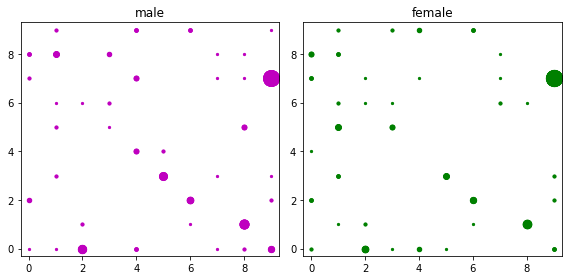

In [14]:
sexes = ['male', 'female']
scolors = ['m','g']
fig, axs = plt.subplots(1,2,figsize=(8,4))
for i in range(len(sexes)):
    counts = np.array([[0] * grid_cols] * grid_rows)
    mps = np.where(sex == i)[0]
    print(mps)
    mps_x = grid_x[mps].astype(int); mps_y = grid_y[mps].astype(int)
    ax = axs[i]
    for mp in range(len(mps_x)):
        counts[mps_y[mp]][mps_x[mp]] += 1
        ax.scatter(mps_x[mp], mps_y[mp], marker='o', s=5*counts[mps_y[mp]][mps_x[mp]],
                   color=scolors[i])
    ax.set(xlim=(-.3,9.3), ylim=(-.3,9.3))
    ax.set(title=sexes[i])
plt.tight_layout()
plt.show()

#### Plot grid positions based on district

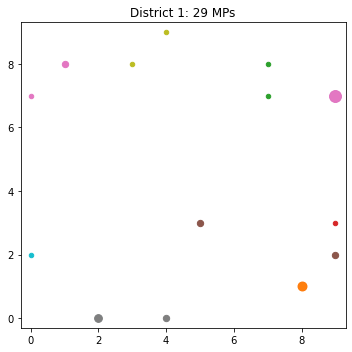

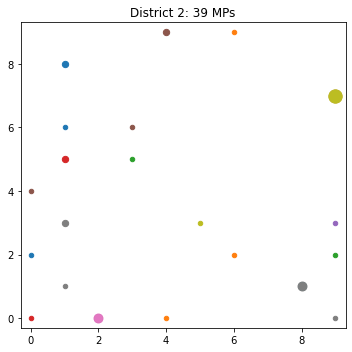

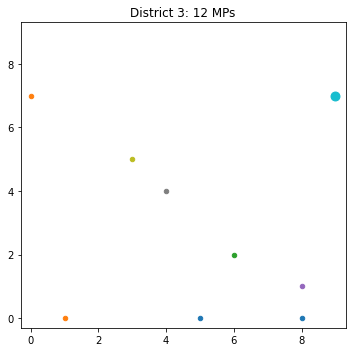

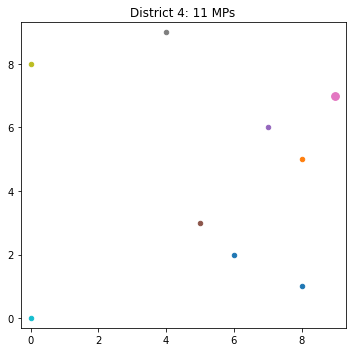

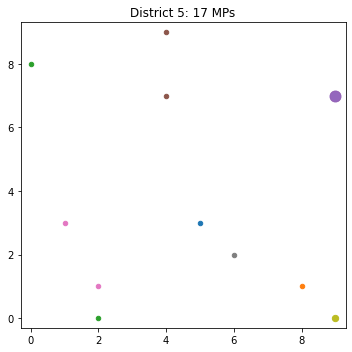

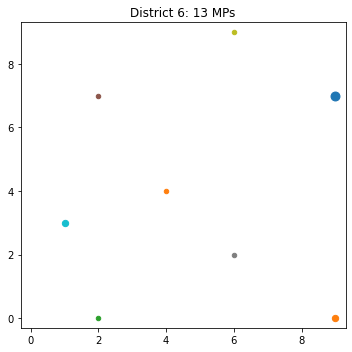

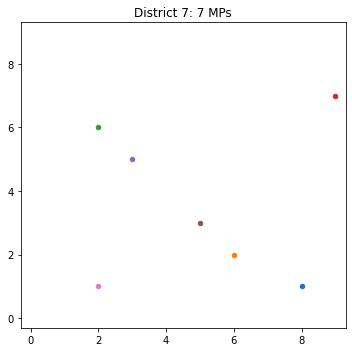

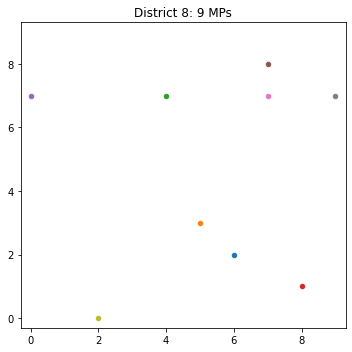

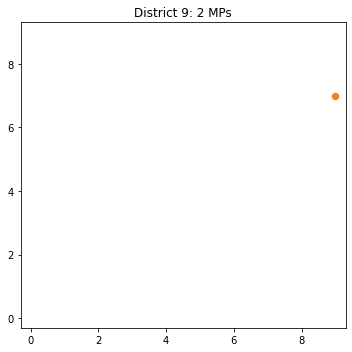

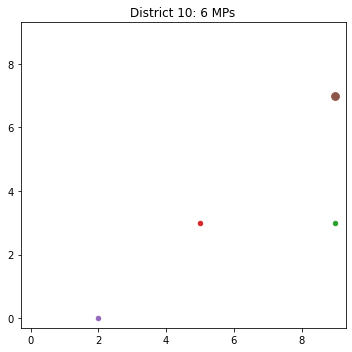

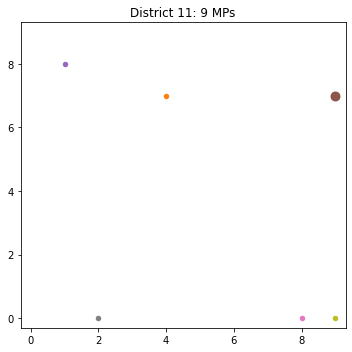

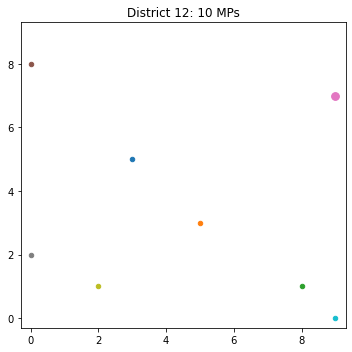

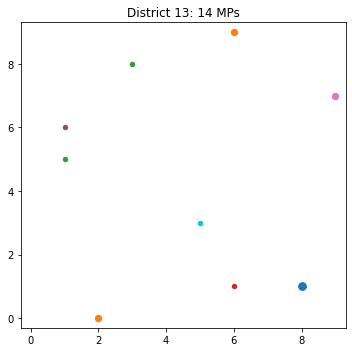

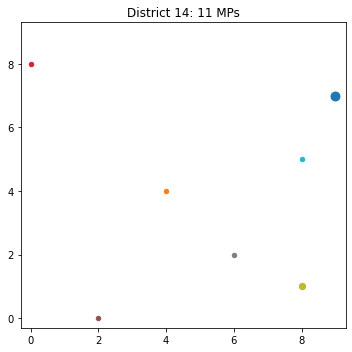

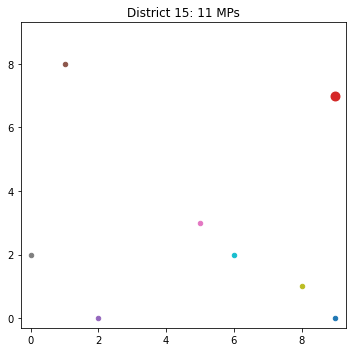

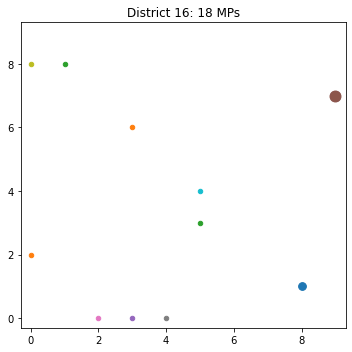

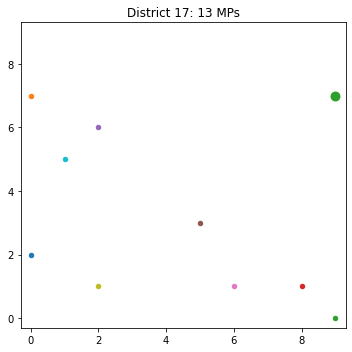

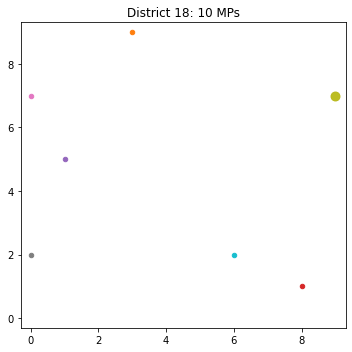

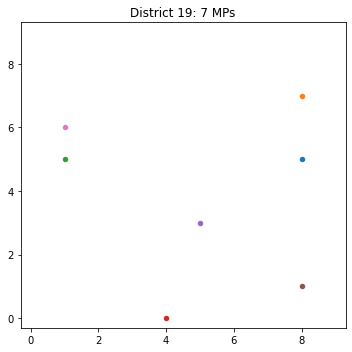

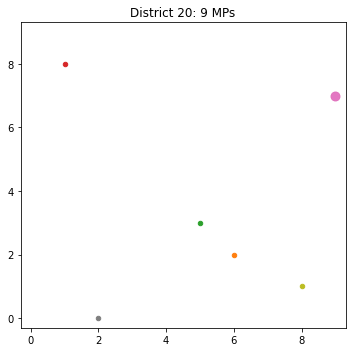

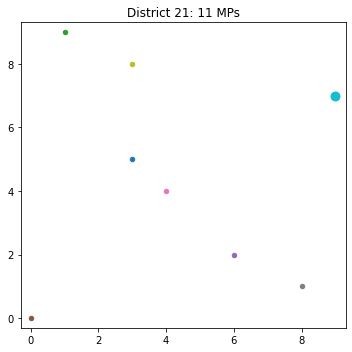

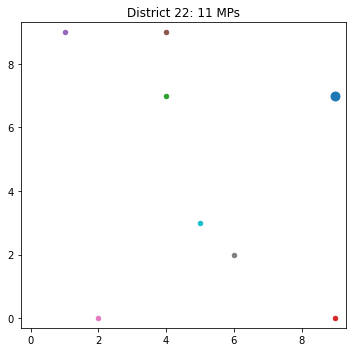

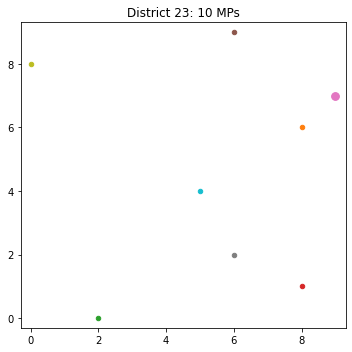

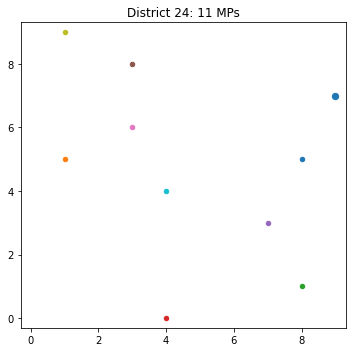

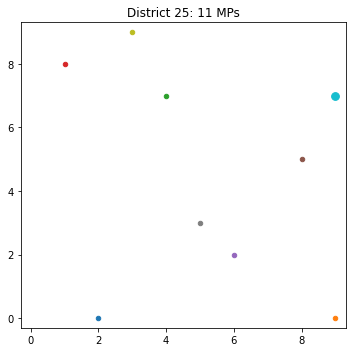

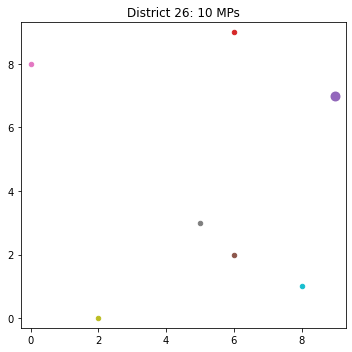

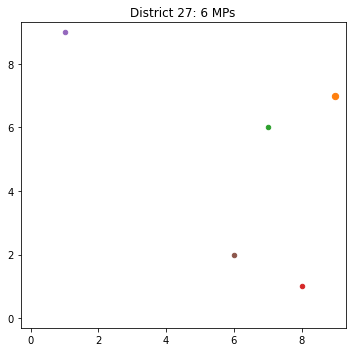

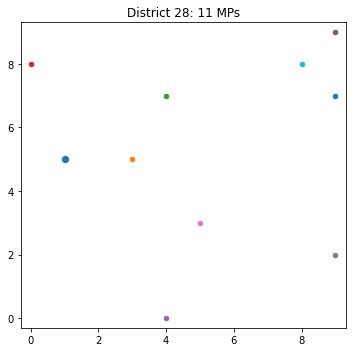

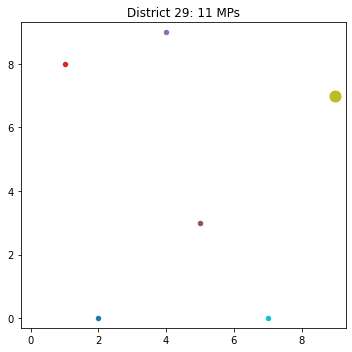

In [13]:
districts = list(set(district.astype(int)))
districts.sort()
dcolors = ['#696b6a', '#52BDEC', '#006AB3', '#E8112d', 
           '#DA291C', '#83CF39', '#000077', '#009933']
for i in range(0,len(districts)):
    plt.figure(figsize=(5,5))
    counts = np.array([[0] * grid_cols] * grid_rows)
    mps = np.where(district == districts[i])[0]
    mps_x = grid_x[mps].astype(int); mps_y = grid_y[mps].astype(int)
    for mp in range(len(mps_x)):
        counts[mps_y[mp]][mps_x[mp]] += 1
        plt.scatter(mps_x[mp], mps_y[mp], marker='o', s=20*counts[mps_y[mp]][mps_x[mp]])
    plt.xlim((-.3,9.3))
    plt.ylim((-.3,9.3))
    plt.title('District %d: %d MPs' % (districts[i],len(mps_x)))
    plt.tight_layout()
    plt.show()